In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.utils import data_utils
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Pre-Trained model

In [2]:
WEIGHTS_PATH = ('/home/ndureja/.keras/models/'
               'vgg16_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('/home/ndureja/.keras/models/'
                       'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

def vgg16(image_height, image_width, channels, NUM_CLASSES, include_top=True, weights='imagenet', pooling=None):
    model = tf.keras.Sequential()
    # 1
    model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     activation=tf.keras.activations.relu,
                                     name='block1_conv1',
                                     input_shape=(image_height, image_width, channels)))
    model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block1_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block1_pool',
                                        padding='same'))

    # 2
    model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block2_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block2_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block2_pool',
                                        padding='same'))

    # 3
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block3_pool',
                                        padding='same'))

    # 4
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block4_pool',
                                        padding='same'))

    # 5
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block5_pool',
                                        padding='same'))

    if include_top:
        # Classification block
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=4096,
                                        activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(units=4096,
                                        activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dropout(rate=0.5))

        model.add(tf.keras.layers.Dense(units=NUM_CLASSES,
                                    activation=tf.keras.activations.softmax))
    else:
        if pooling == 'avg':
            model.add(tf.keras.layers.GlobalAveragePooling2D())
        elif pooling == 'max':
            model.add(tf.keras.layers.GlobalMaxPooling2D())

    if weights == 'imagenet':
        if include_top:
            weights_path = data_utils.get_file(
            'vgg16_weights_tf_dim_ordering_tf_kernels.h5',
            WEIGHTS_PATH,
            cache_subdir='models',
            file_hash='64373286793e3c8b2b4e3219cbf3544b')
        else:
            weights_path = data_utils.get_file(
                'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                file_hash='6d6bbae143d832006294945121d1f1fc')
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model

## Loading training and validation data

In [3]:
#Using same augmentation parameters that are used in data augmentation file
train_datagen = ImageDataGenerator(rescale = 1./255,#rescaling
                                  validation_split=0.2, #validation split
                                  rotation_range=15, # rotation
                                  zoom_range=0.2, # zoom
                                  horizontal_flip=True, # horizontal flip
                                  width_shift_range=0.2, # horizontal shift
                                  height_shift_range=0.2, # vertical shift
                                  brightness_range=[0.2,1.2]) # brightness
#Loading training images
train_generator = train_datagen.flow_from_directory(
        'train/',  
        target_size=(224, 224),  
        batch_size= 32,
        class_mode='categorical', subset="training") 

#Loading validation images from train directory
validation_generator = train_datagen.flow_from_directory(
        'train/',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical', subset="validation")

Found 2584 images belonging to 3 classes.
Found 645 images belonging to 3 classes.


In [4]:
train_generator.class_indices #Indices for different image categories

{'covid_pneumonia': 0, 'healthy': 1, 'pneumonia': 2}

## Training the model

In [5]:
baseModel = vgg16(224, 224, 3, 3, include_top=False) #Calling pre-trained model
headModel = baseModel.output

#Adding layers
headModel = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = tf.keras.layers.Flatten(name='flatten')(headModel)
headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc1')(headModel)
headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc2')(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(3, activation='softmax')(headModel)

# create a model object
model = Model(inputs=baseModel.input, outputs=headModel)

# Existing weights not trained
for layer in baseModel.layers:
    layer.trainable = False

#structure of the model    
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1_input (InputLay (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Fitting the model on our dataset images

In [6]:
#Loss and optimization method on model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Fit the model on traing data
hist = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=50,
  steps_per_epoch=100,
  validation_steps=10
)

Epoch 1/50
100/100 [==============================] - 97s 974ms/step - loss: 0.9685 - acc: 0.5298 - val_loss: 0.7014 - val_acc: 0.7031
Epoch 2/50
100/100 [==============================] - 58s 576ms/step - loss: 0.7267 - acc: 0.6656 - val_loss: 0.7946 - val_acc: 0.6750
Epoch 3/50
100/100 [==============================] - 58s 585ms/step - loss: 0.6894 - acc: 0.6741 - val_loss: 0.6288 - val_acc: 0.7375
Epoch 4/50
100/100 [==============================] - 57s 570ms/step - loss: 0.6809 - acc: 0.6869 - val_loss: 0.6223 - val_acc: 0.7500
Epoch 5/50
100/100 [==============================] - 63s 628ms/step - loss: 0.6906 - acc: 0.6783 - val_loss: 0.6246 - val_acc: 0.7063
Epoch 6/50
100/100 [==============================] - 61s 609ms/step - loss: 0.6646 - acc: 0.6937 - val_loss: 0.6199 - val_acc: 0.7344
Epoch 7/50
100/100 [==============================] - 60s 603ms/step - loss: 0.6275 - acc: 0.7120 - val_loss: 0.7081 - val_acc: 0.7312
Epoch 8/50
100/100 [==============================] - 6

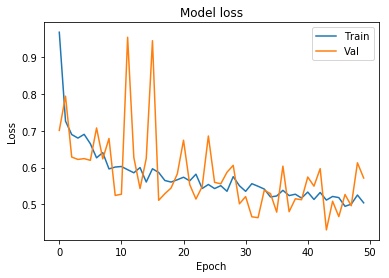

In [7]:
#plotting the loss and val_loss for the model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

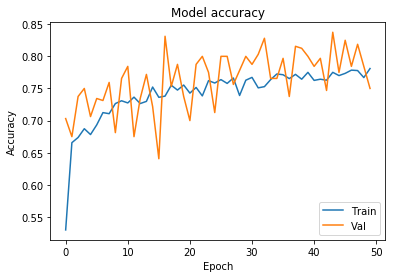

In [8]:
#plotting the accuracy and val_acc for the model
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()